<a href="https://colab.research.google.com/github/ckalibsnelson/HackCville---Node-A/blob/master/07_More_advanced_ML_concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More Advanced ML topics covered

- support vector machines
- validation set
- cross validation
- parameter tuning
- linear scaling for features

In [0]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For data examples
from sklearn import datasets

## Support Vector Machines (SVM)

This code is a modified version of the following jupyter notebook: 

https://github.com/ageron/handson-ml/blob/master/05_support_vector_machines.ipynb

This github repository corresponds with a free textbook that is a great resource if you want to keep learning more ML. It dives deeper into implementions and the math behind the models than we're able to in class. Definitely recommend it if you're feeling like you want to learn more!

In [0]:
# Support Vector Classifier (SVC) 
# An SVC is just a Support Vector Machine (SVM) used for classification
from sklearn.svm import SVC

In [0]:
# Getting Iris data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

### Training  an SVC that Perfectly Separates the Training Data

In [0]:
# Getting only examples corresponding to setosa and versicolor
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [0]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf")) # Large C 
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

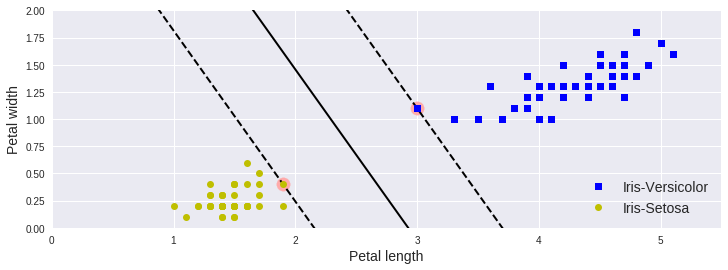

In [0]:
#######################################################################
# THIS CODE CAN BE IGNORED
# You'll never have to do something like this in practce
# This is just to help demonstrate what a SVM results in

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
    
plt.figure(figsize=(12, 4))
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()
## ABOVE CODE CAN ALL BE IGNORED
########################################################################

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(svm_clf.predict(X), y)

1.0

#### Does it makes sense that our accuracy is perfect? 
It makes sense that the resulting accuracy is 1 since the data is perfectly divided in the above plot. 

This isn't really a good example of a real ML model since there was no training set and testing set. The above example is really just to demonstrate how an SVM works.

### Training an SVC that Almost Perfectly Separates the Training Data

In [0]:
# Will be better understood later in the notebook
# But in order to use the Iris data to train an SVM classifier it must first be
# scaled
def linear_scale(series):
  """Scales a numeric column to between -1 and 1"""
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2.0
  return series.apply(lambda x:((x - min_val) / scale) - 1.0)

In [0]:
# Traing an SVM to predict Iris-Virginica vs. Rest
X = iris["data"][:, (2, 3)]  # petal length, petal width
X_df = pd.DataFrame(X)
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

X_df = X_df.apply(linear_scale)

In [0]:
# SVM Classifier 
svm_clf_1 = SVC(kernel="linear", C=1)
svm_clf_1.fit(X, y)

svm_clf_100 = SVC(kernel="linear", C=100)
svm_clf_100.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

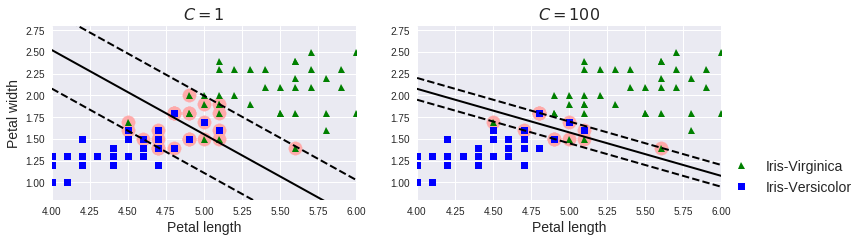

In [0]:
######################################################################
# THIS CODE CAN BE IGNORED
# You'll never have to do something like this in practce
# This is just to help demonstrate what a SVM results in
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf_1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf_1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf_100, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.legend(loc=(1, 0), fontsize=14)
plt.title("$C = {}$".format(svm_clf_100.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])
plt.show()
## ABOVE CODE CAN ALL BE IGNORED
#######################################################################

In [0]:
print('When C is 1: accuracy=' + str(accuracy_score(svm_clf_1.predict(X), y)))
print('When C is 100: accuracy=' + str(accuracy_score(svm_clf_100.predict(X), y)))

When C is 1: accuracy=0.9666666666666667
When C is 100: accuracy=0.96


#### Do the different accuracies make sense? 

It does make sense that the accuracies aren't the same because we changed the C value. We wanted less errors on the training data in the SVM with C = 100 and thus it had a higher accuracy score. In practice however, doing this may have resulted in overfitting our training data and could be the wrong decision. 

### Training an SVC with Different Kernels

For now, all you need to understand about a kernel is that by changing it from 'linear' we'll be making a separating line that is curved in some way. The 'poly' kernel will use a polynomial line of the degree you set. The 'rbf' kernel uses a function that you don't have to worry about for the moment. 

In [0]:
# Creating a non-linear dataset to use
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [0]:
##########################################################################
# THIS CODE CAN BE IGNORED
# It isn't neccesary to understand these two methods to understand the SVM
# They just make our demonstrations easier to make
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

## Don't need to worry about the above stuff
###########################################################################

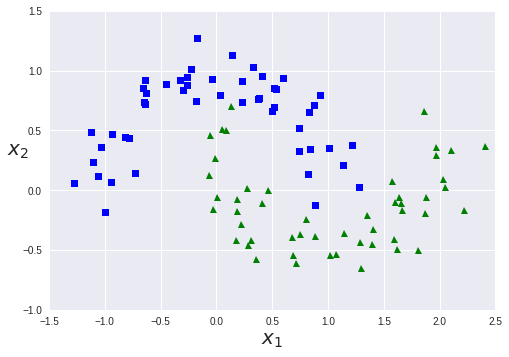

In [0]:
# Taking a look at the data    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

As you can see a linear separator wouldn't really do the trick here. We're gonna have to try something new to get a good classifier. 

In [0]:
# Training a polynomial classifier of degree 3
poly3_svm_clf = SVC(kernel="poly", gamma='auto', degree=3, coef0=1) # coef0 and gamma are other hyperparameters of a polynomial SVM.
poly3_svm_clf.fit(X ,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

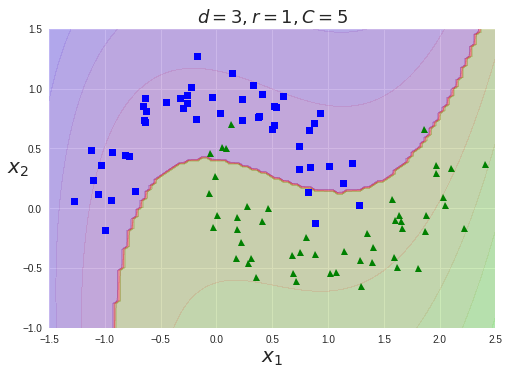

In [0]:
plot_predictions(poly3_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)
plt.show()

In [0]:
# Training an rbf classifier
rbf_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001) # coef0 is another hyperparameter of the SVM.
rbf_svm_clf.fit(X ,y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

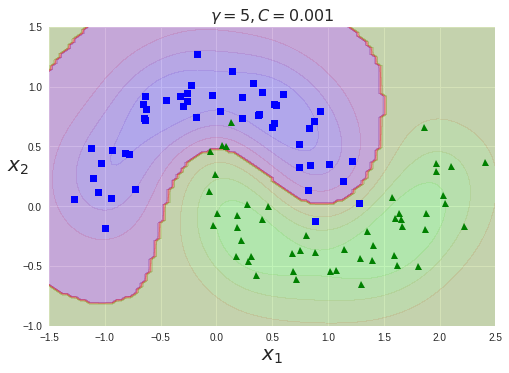

In [0]:
plot_predictions(rbf_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma = 5, C = 0.001$", fontsize=16)
plt.show()

## Precision, Recall and F-1 Scores
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png)

In [0]:
# Getting Iris data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [0]:
# Importing LogisticRegression and split function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # how to split the data using an sklearn function

In [0]:
# Training the Logistic Regression model
log = LogisticRegression() 
log.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
# Makingn predictions on the train set
y_pred = log.predict(X_train)

In [0]:
# Importing the different metrics we'll use
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [0]:
# Just Accuracy
print("Accuracy: " + str(accuracy_score(y_pred, y_train)))

Accuracy: 0.8583333333333333


In [0]:
# Precision, recall, and F-1 scores for each class 
print("Precision: " + str(precision_score(y_pred, y_train, average=None)))
print("Recall: " + str(recall_score(y_pred, y_train, average=None)))
print("F-1 Score: " + str(f1_score(y_pred, y_train, average=None)))

Precision: [1.         0.68292683 0.8974359 ]
Recall: [1.         0.875      0.72916667]
F-1 Score: [1.         0.76712329 0.8045977 ]


In [0]:
# Precision, recall and F-1 scores on the whole
# Before it was done by class but by specifying average = 'micro' we are telling
# the function to do this across all examples
print("Precision: " + str(precision_score(y_pred, y_train, average='micro')))
print("Recall: " + str(recall_score(y_pred, y_train, average='micro')))
print("F-1 Score: " + str(f1_score(y_pred, y_train, average='micro')))

Precision: 0.9937369519832986
Recall: 0.9937369519832986
F-1 Score: 0.9937369519832986


## Validation and Cross Validation

![alt text](https://developers.google.com/machine-learning/crash-course/images/PartitionThreeSets.svg)

In [0]:
# CODE SNIPPET: create 60% training set, 20% validation set, and 20% test set

from sklearn.model_selection import train_test_split

x_train, x_test_val, y_train, y_test_val = train_test_split(X_data, Y_data, test_size=0.4) # take off 40% for testing + validation
x_test, x_validation, y_test, y_validation = train_test_split(x_test_val, y_test_val, test_size=0.5) # split the test + validation data evenly

# now don't touch x_test and y_test till the very end!

![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [0]:
# CODE SNIPPET: perform cross validation on your model

# cross-validation will be sufficient to show that your trained ML model can be generalized to testing data, without a validation set
# you may still have a training, validation, and test set with cross-validation, but it might be overkill

from sklearn.model_selection import cross_val_score

cross_val_score(classifier, X_train, Y_train, cv=5) # adjust how many cv (cross-validation folds) you want

## Parameter Tuning

[lots of different ways to choose your model's parameters](https://scikit-learn.org/stable/modules/grid_search.html#alternatives-to-brute-force-parameter-search)

In [0]:
# Import the Decision Tree and the datasets we'll use
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# Import train_test_split
from sklearn.model_selection import train_test_split

In [0]:
# Getting dataset to use
# This is data provided by sklearn for identifying hand-drawn digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [0]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # how to split the data using an sklearn function

In [0]:
# Importing GridSearch method
from sklearn.model_selection import GridSearchCV

In [0]:
# Making dict of all the hyperparameters we want to try
param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
#len(param_grid['min_samples_split']) * len(param_grid['max_depth']) # This represents the total number of ways we can combine these two parameters

The 'min_samples_split' is the minimum number of values in an internal node that are required for a split to occur. 

'max_depth' is the maximum number nodes that the tree can go down before stopping splitting. 

In [0]:
# Performing cross validation on every combination in that grid
# and selecting the parameters that give us the best F-1 score
# This is going to take a little bit (minute or two)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
grid_search.best_params_

{'max_depth': 11, 'min_samples_split': 10}

### What's going on in that GridSearchCV function? 
The GridSearchCV method cross validates each possible pairing of the parameters you pass. It then trains a model and validates it on each by performing cross validation with 5 folds (since cv=5).  It finds the average accuracy score for each of these parameter pairings and then returns the pairing that results in the best accuracy score. Then, we can get those parameters and train our final model using them!

**Bonus:** If you've looked through the other scoring metrics above you can try the following and see what you get as well:

- 'f1_micro' 
- 'precision_micro'
- 'recall_micro'

## One-Hot Encoding

Suppose we created a feature that can take any of the values `0`, `1` or `2`, and that we have a few training points:

| # | feature_value |
|---|---------------|
| 0 |             2 |
| 1 |             0 |
| 2 |             1 |

For each possible categorical value, we make a new **binary** feature of **real values** that can take one of just two possible values: 1.0 if the example has that value, and 0.0 if not. In the example above, the categorical feature would be converted into three features, and the training points now look like:

| # | feature_value_0 | feature_value_1 | feature_value_2 |
|---|-----------------|-----------------|-----------------|
| 0 |             0.0 |             0.0 |             1.0 |
| 1 |             1.0 |             0.0 |             0.0 |
| 2 |             0.0 |             1.0 |             0.0 |

In [0]:
import pandas as pd

new_df = pd.get_dummies(df) # all columns with type "category" or "object" will be converted

new_df = pd.get_dummies(df, columns=['col1', 'col2']) # only the specified columns will be converted

## Feature Transforming

If some columns contain data that has a large range, then some models may not converge on an appropriate solution for the problem. One way to solve this is to ensure all the columns in your dataframe are within a range of [-1, 1] using linear scaling

In [0]:
def linear_scale(series):
  """Scales a numeric column to between -1 and 1"""
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2.0
  return series.apply(lambda x:((x - min_val) / scale) - 1.0)

def log_normalize(series):
  """Scales a numeric column to between 0 and 1"""
  return series.apply(lambda x:math.log(x+1.0))

def clip(series, clip_to_min, clip_to_max):
  """sets a threshold for the minimum and the maximum values"""
  return series.apply(lambda x:(
    min(max(x, clip_to_min), clip_to_max)))

def z_score_normalize(series):
  """Normalizes by the z-score of a series"""
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

def binary_threshold(series, threshold):
  """Turn a column into a column of 1s or 0s, standing for greater than or less than a specified threshold"""
  return series.apply(lambda x:(1 if x > threshold else 0))

In [0]:
def normalize(examples_dataframe):
  """Returns a version of the input `DataFrame` that has all its features normalized"""
  new_df = pd.DataFrame()
  for col in examples_dataframe.columns:
    new_df[col] = linear_scale(examples_dataframe[col]) # pick your normalization function here
  return new_df

In [0]:
def normalize_specific(examples_dataframe):
  """Applies different normalization functions to different columns"""
  new_df = pd.DataFrame()
  new_df['col1'] = linear_scale(clip(examples_dataframe['col1'], 0, 100)) # might be good for a column with outliers
  new_df['col2'] = linear_scale(examples_dataframe['col2'])
  new_df['col3'] = z_score_normalize(examples_dataframe['col3'])
  new_df['col4'] = binary_threshold(examples_dataframe['col4'], 20)